In [1]:
#import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pickle

In [2]:
#load the dataset
df = pd.read_csv('spam.csv',encoding='latin-1')
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df = df.rename(columns={"v1":'label', "v2":'text'})
print(df.head())
label = df["label"]
texts = df["text"]

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


### To do: develop an accurate simple neural network model for spam classification (no LSTM, CNN, etc.)

In [3]:
#Data is cleaned
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
#number of spam and ham labels 
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

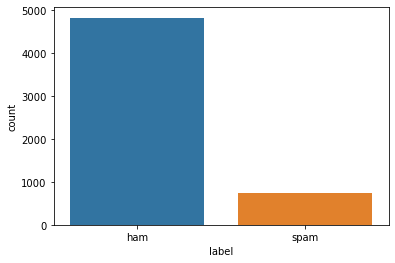

In [5]:
#visualize the data by plotting
sns.countplot(x=df['label'])
plt.show()

In [6]:
#this will change the SMS label to binary values
df['label'] = df['label'].map( {'spam': 1, 'ham': 0} )
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df_ham  = df[df['label'] == 0].copy()
df_spam = df[df['label'] == 1].copy()

In [8]:
#import tensorflow keras libraries
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
X = df['text'].values#input
y = df['label'].values#output
#split the training and testing data, test size at 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)

In [10]:
#prepare tokenizer
t = Tokenizer()
t.fit_on_texts(X_train)

#integer encode the documents
encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)

vocab_size = len(t.word_index) + 1

print(encoded_train[0:2])

[[175, 64, 23, 59, 1, 144, 1307, 24, 1308], [170, 315, 114, 32, 1011, 673, 14, 921, 599, 87, 67, 600, 2, 1143, 18, 776, 845, 91, 171, 270, 776, 1144, 1507, 674, 846, 847, 241]]


In [11]:
#document padding to a max length of 4 words
max_length = 8
train_pad = pad_sequences(encoded_train, maxlen=max_length, padding='post')
test_pad = pad_sequences(encoded_test, maxlen=max_length, padding='post')

print(train_pad)

[[  64   23   59 ... 1307   24 1308]
 [ 270  776 1144 ...  846  847  241]
 [1821   86 3531 ...   77    3  778]
 ...
 [1191    2 1742 ...    9  119  326]
 [ 176    2    9 ...    3    8  783]
 [  27    3   85 ...    5  289  535]]


In [12]:
#define the model
model = Sequential()
model.add(Embedding(vocab_size, 24, input_length=max_length))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))#classification with 1 output

#compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#summary of the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 8, 24)             178752    
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense (Dense)               (None, 500)               96500     
                                                                 
 dense_1 (Dense)             (None, 200)               100200    
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 395,653
Trainable params: 395,653
Non-trai

In [13]:
#fitting the model
model.fit(x=train_pad, y=y_train, epochs=100, validation_data=(test_pad, y_test))

Epoch 1/100
122/122 [==============================] - 2s 6ms/step - loss: 0.1961 - accuracy: 0.9215 - val_loss: 0.0836 - val_accuracy: 0.9773
Epoch 2/100
122/122 [==============================] - 0s 4ms/step - loss: 0.0496 - accuracy: 0.9862 - val_loss: 0.0689 - val_accuracy: 0.9809
Epoch 3/100
122/122 [==============================] - 0s 4ms/step - loss: 0.0197 - accuracy: 0.9946 - val_loss: 0.0844 - val_accuracy: 0.9785
Epoch 4/100
122/122 [==============================] - 0s 4ms/step - loss: 0.0035 - accuracy: 0.9990 - val_loss: 0.1278 - val_accuracy: 0.9809
Epoch 5/100
122/122 [==============================] - 1s 4ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.1544 - val_accuracy: 0.9797
Epoch 6/100
122/122 [==============================] - 0s 4ms/step - loss: 1.7100e-06 - accuracy: 1.0000 - val_loss: 0.2062 - val_accuracy: 0.9785
Epoch 7/100
122/122 [==============================] - 0s 4ms/step - loss: 1.4931e-08 - accuracy: 1.0000 - val_loss: 0.2252 - val_accuracy

In [14]:
#model evaluation
model.evaluate(test_pad, y_test)


53/53 [==============================] - 0s 2ms/step - loss: 0.2683 - accuracy: 0.9779


[0.2682678699493408, 0.9778708219528198]

In [15]:
test_pred = pd.read_csv('output_spam.csv',encoding='latin-1')

In [16]:
print(test_pred)

    ï»¿                                               text
0     1  Feel Yourself That You Are Always Happy.. Slow...
1     2  staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
2     3                        Send me yetty's number pls.
3     4  Hey so this sat are we going for the intro pil...
4     5  I got it before the new year cos yetunde said ...
5     6  Hey we can go jazz power yoga hip hop kb and y...
6     7  Hey mate. Spoke to the mag people. Weâ°ÃÃ·re...
7     8                             Morning only i can ok.
8     9                               Wat time Ã_ finish?
9    10              Shant disturb u anymore... Jia you...
10   11  4mths half price Orange line rental & latest c...
11   12  Your opinion about me? 1. Over 2. Jada 3. Kusr...
12   13  MOON has come to color your dreams, STARS to m...
13   14  You are a winner U have been specially selecte...
14   15  Unless it's a situation where YOU GO GURL woul...
15   16  Awww dat is sweet! We can think of something t.

In [17]:
model.save("spam_model")

INFO:tensorflow:Assets written to: spam_model\assets


In [18]:
with open('spam_model/tokenizer.pkl', 'wb') as output:
    pickle.dump(t, output, pickle.HIGHEST_PROTOCOL)

In [19]:
s_model = tf.keras.models.load_model("spam_model")

with open('spam_model/tokenizer.pkl', 'rb') as input:
    tokener = pickle.load(input)

In [20]:
sms = test_pred['text']

sms_notif = tokener.texts_to_sequences(sms)#converts text to numerical values before prediction
sms_notif = pad_sequences(sms_notif, maxlen=max_length, padding='post')
#PREDICTION
pred = (model.predict(sms_notif) > 0.5).astype("int32").flatten()#flatten to make a 1D arroy output prediction
pred

1/1 [==============================] - 0s 117ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [21]:
#save the prediction on a csv file
Submission=pd.DataFrame(pred, columns=['Label']).to_csv('Laban_spam_output.csv')